# CICIDS

### **random_forest.ipynb**

The CICIDS2017 dataset is a comprehensive dataset for network intrusion detection, created by the Canadian Institute for Cybersecurity. It includes a diverse set of attack scenarios and normal traffic, making it suitable for training and evaluating intrusion detection systems.

The dataset includes various types of attacks such as Brute Force, Heartbleed, Botnet, DoS (Denial of Service), DDoS (Distributed Denial of Service), Web attacks, and Infiltration of the network from inside.

In [1]:
model_name = "random_forest_(BINARY)"

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Step 1. Read data and import necessary libraries

In [3]:
import pandas as pd
df_train = pd.read_csv("../data/sampled/sampled_10000_10000.csv")

# Strip leading/trailing white space in column names
df_train.columns = df_train.columns.str.strip()

In [4]:
df_train.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,514645,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,339,2,2,62,748,31,31,31.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,39394,51,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,61777,1,1,45,151,45,45,45.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,53,23351,1,1,43,59,43,43,43.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df_train.shape

(20000, 79)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             20000 non-null  int64  
 1   Flow Duration                20000 non-null  int64  
 2   Total Fwd Packets            20000 non-null  int64  
 3   Total Backward Packets       20000 non-null  int64  
 4   Total Length of Fwd Packets  20000 non-null  int64  
 5   Total Length of Bwd Packets  20000 non-null  int64  
 6   Fwd Packet Length Max        20000 non-null  int64  
 7   Fwd Packet Length Min        20000 non-null  int64  
 8   Fwd Packet Length Mean       20000 non-null  float64
 9   Fwd Packet Length Std        20000 non-null  float64
 10  Bwd Packet Length Max        20000 non-null  int64  
 11  Bwd Packet Length Min        20000 non-null  int64  
 12  Bwd Packet Length Mean       20000 non-null  float64
 13  Bwd Packet Lengt

In [7]:
df_train.describe()

c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.00000,20000.000000,20000.000000,...,20000.000000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,5936.555950,1.658223e+07,9.299350,8.336800,1.429634e+03,8.780229e+03,197.491500,16.91885,57.821005,63.811307,...,4.719050,27.907200,3.232478e+05,1.138442e+05,4.313192e+05,2.444209e+05,8.488926e+06,1.036975e+06,9.639811e+06,7.677699e+06
std,15701.967114,3.329641e+07,102.350682,101.169224,3.591803e+04,2.007295e+05,787.346065,98.44432,222.373114,264.911494,...,78.839857,6.576317,1.467275e+06,7.633679e+05,1.824990e+06,1.355701e+06,2.352571e+07,5.304882e+06,2.492887e+07,2.318181e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.840000e+02,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.016825e+05,2.000000,2.000000,4.700000e+01,4.600000e+01,30.000000,0.00000,15.500000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,9.166827e+06,6.000000,4.000000,2.100000e+02,3.457500e+02,195.000000,6.00000,50.500000,67.803007,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65502.000000,1.199972e+08,5523.000000,6509.000000,2.866110e+06,1.160000e+07,23360.000000,1983.00000,5939.285714,5762.073497,...,5522.000000,56.000000,7.240000e+07,2.610000e+07,7.240000e+07,7.240000e+07,1.199200e+08,6.650000e+07,1.199200e+08,1.199200e+08


## Step 2. Data Cleaning

### A. Missing values

In [8]:
print(df_train.isna().sum().sum())

6


In [9]:
df_train.dropna(subset=["Flow Bytes/s"], inplace=True)

In [10]:
print(df_train.isna().sum().sum())

0


### Inf. values

In [11]:
import numpy as np
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()

## Step 3. Data Preparation

### A. Normalise numeric features

In [12]:
# Get all numerical columns
numerical_columns = df_train.select_dtypes(include="number").columns

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

### B. Map Labels to binary

In [14]:
# Step 2: Convert multi-class labels to binary labels
df_train["Label"] = df_train["Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

In [16]:
df_train['Label'].value_counts()

Label
0    9994
1    9989
Name: count, dtype: int64

### C. Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns="Label")
y = df_train["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4. Model

#### A. Defining the model

In [18]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import numpy as np

In [ ]:
param_dist = {
	"n_estimators": np.arange(200, 301, 50),
	"max_depth": [10, 20, 30, 40],
	"min_samples_split": [2, 4, 6],
	"min_samples_leaf": [1, 2, 3],
	"max_features": ["sqrt", "log2"],
	"bootstrap": [True, False]
}

# Best parameters found:  {
    # 'n_estimators': 325, 
    # 'min_samples_split': 4, 
    # 'min_samples_leaf': 1, 
    # 'max_features': 'sqrt', 
    # 'max_depth': 30, 
    # 'bootstrap': False
# }

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
	rf, param_distributions=param_dist,
	n_iter=200, cv=5,
	n_jobs=-1, verbose=3,
	random_state=42, return_train_score=True)

random_search.fit(X_train, y_train)

# 13m 30s	(1000 fits)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([200, 250, 300])},
                   random_state=42, return_train_score=True, verbose=3)

### B. Training the model

In [ ]:
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Best parameters found:  {
    # 'n_estimators': 250, 
    # 'min_samples_split': 4, 
    # 'min_samples_leaf': 1, 
    # 'max_features': 'sqrt', 
    # 'max_depth': 20, 
    # 'bootstrap': False
# }

Best parameters found:  {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [ ]:
param_grid = {
	"n_estimators": [best_params["n_estimators"] - 25, best_params["n_estimators"], best_params["n_estimators"] + 25],
	"min_samples_split": [max(2, best_params["min_samples_split"] - 1), best_params["min_samples_split"], best_params["min_samples_split"] + 1],
	"min_samples_leaf": [max(1, best_params["min_samples_leaf"] - 1), best_params["min_samples_leaf"], best_params["min_samples_leaf"] + 1],
	"max_features": [best_params["max_features"]],
	"max_depth": [best_params["max_depth"] - 5 if best_params["max_depth"] is not None else None, best_params["max_depth"], best_params["max_depth"] + 5 if best_params["max_depth"] is not None else None],
	"bootstrap": [best_params["bootstrap"]],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 7m 8s	(405 fits)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [15, 20, 25],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 1, 2],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [225, 250, 275]},
             verbose=2)

In [30]:
print("Best parameters found by GridSearchCV: ", grid_search.best_params_)

Best parameters found by GridSearchCV:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 275}


### G. Evaluating the model

In [31]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [35]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):0.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):0.5f}")

Accuracy: 0.99625
F1 Score: 0.99625


In [36]:
print(classification_report(y_test, y_pred, target_names=["BENIGN", "Attack"]))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1985
      Attack       1.00      1.00      1.00      2012

    accuracy                           1.00      3997
   macro avg       1.00      1.00      1.00      3997
weighted avg       1.00      1.00      1.00      3997



### **Previous results:**

| Metric          | Regular, multi-class | CV, multi-class | CV, binary  | does the binary model perform better than multi-class? |
| --------------- | -------------------- | --------------- | ----------- | ------------------------------------------------------ |
| Accuracy        | 0.95                 | 0.98            | 1.00        | <span style="color:#20ff20;">yes</span>                |
| MA Range        | 0.95 - 0.95          | 0.89 - 0.91     | 1.00 - 1.00 | <span style="color:#20ff20;">yes</span>                |
| WA Range        | 0.95 - 0.95          | 0.98 - 0.98     | 1.00 - 1.00 | <span style="color:#20ff20;">yes</span>                |
| Precision range | 0.66 - 1.00          | 0.36 - 1.00     | 1.00 - 1.00 | <span style="color:#20ff20;">yes</span>                |
| Recall range    | 0.57 - 1.00          | 0.57 - 1.00     | 1.00 - 1.00 | <span style="color:#20ff20;">yes</span>                |
| F1 range        | 0.63 - 1.00          | 0.44 - 1.00     | 1.00 - 1.00 | <span style="color:#20ff20;">yes</span>                |

In [37]:
# Get feature importances
feature_importances = best_rf.feature_importances_
features = X.columns

feature_importances_df = pd.DataFrame({
    "Feature": features,
	"Importance": feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)
feature_importances_df["Importance"] = round((feature_importances_df["Importance"] * 100), 4)
feature_importances_df

,Feature,Importance
0,Destination Port,8.9057
66,Init_Win_bytes_forward,8.6801
67,Init_Win_bytes_backward,5.7023
11,Bwd Packet Length Min,4.2178
38,Min Packet Length,4.1074
...,...,...
56,Fwd Avg Bytes/Bulk,0.0000
33,Bwd URG Flags,0.0000
32,Fwd URG Flags,0.0000
31,Bwd PSH Flags,0.0000


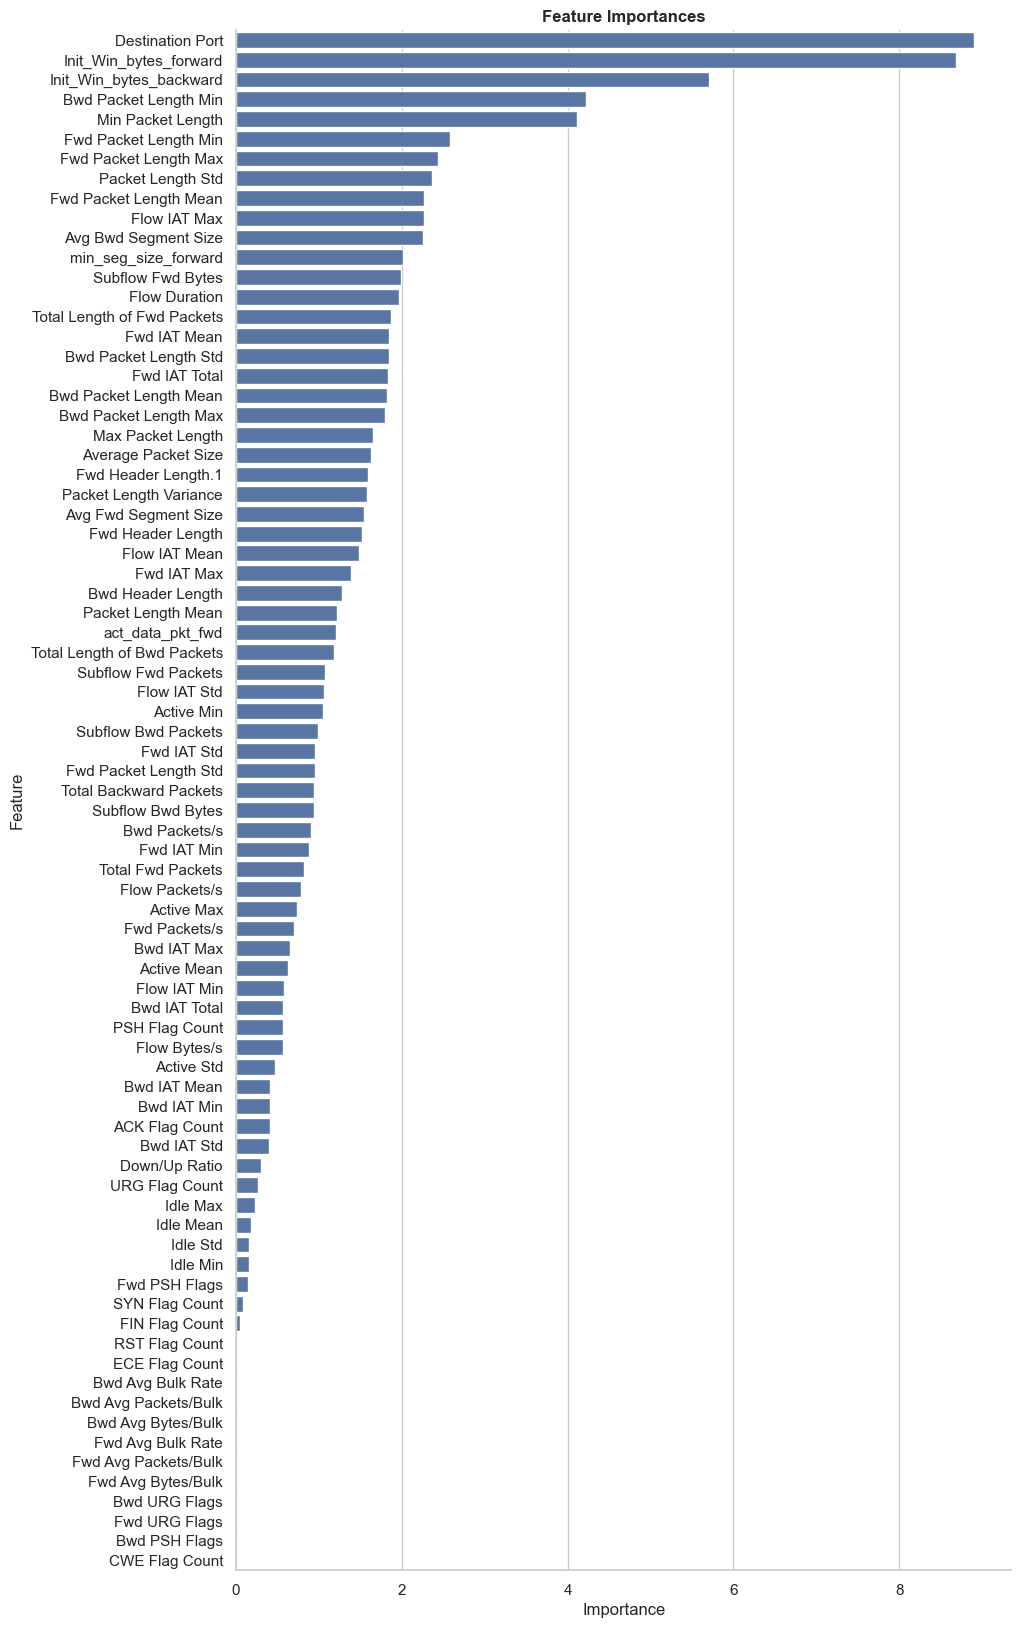

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
plt.title("Feature Importances", fontweight="bold")
sns.despine()
plt.show()

In [43]:
import joblib

_name = f"../models/binary/{model_name}.joblib"
joblib.dump(best_rf, _name)

print(f"Model saved to {_name}")

Model saved to ../models/binary/random_forest_(BINARY).joblib
